# Grover's algorithm

### Import section

In [51]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import StatevectorSimulator, QasmSimulator, UnitarySimulator
from qiskit_ibm_runtime import *
import numpy as np
from math import pi

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

## 1. Example with 2 qubits

In [13]:
n = 2;

qc = QuantumCircuit(n)

# first we initialize in a uniform superposition
for iq in range(n):
    qc.h(iq)

#### Oracle for $|w\rangle=|11\rangle$

In [14]:
qc.cz(0,1)

#### Apply the reflection $U_s$

In [15]:
for iq in range(n):
    qc.h(iq)
    qc.z(iq)
    
qc.cz(0,1)

#### Final H gates on all qubits

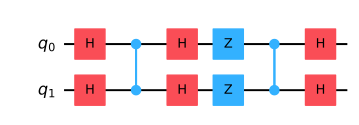

In [16]:
for iq in range(n):
    qc.h(iq)
    
qc.draw('mpl')

{'11': 1}


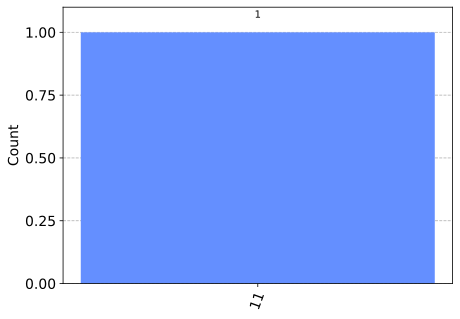

In [17]:
qc.measure_all()

backend = QasmSimulator()
counts = backend.run(qc,shots = 1).result().get_counts()
print(counts)
plot_histogram(counts)

### Circuit with oracle for $|00\rangle$

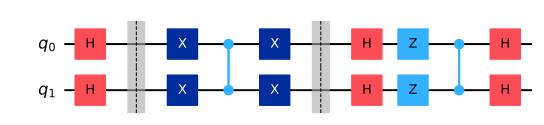

In [18]:
n = 2;

qc = QuantumCircuit(n)

# first we initialize in a uniform superposition
for iq in range(n):
    qc.h(iq)
    
qc.barrier()

# oracle
qc.x(0)
qc.x(1)
qc.cz(0,1)
qc.x(0)
qc.x(1)

qc.barrier()

# reflection
for iq in range(n):
    qc.h(iq)
    qc.z(iq)
    
qc.cz(0,1)

#final H
for iq in range(n):
    qc.h(iq)
    
qc.draw('mpl')

{'00': 1}


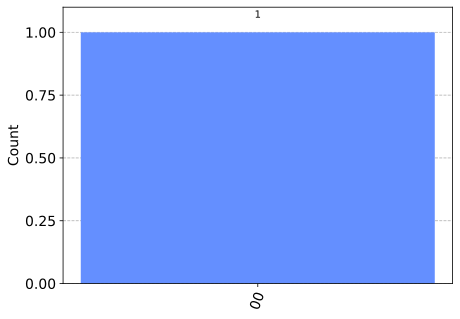

In [19]:
qc.measure_all()

backend = QasmSimulator()
counts = backend.run(qc,shots = 1).result().get_counts()
print(counts)
plot_histogram(counts)

### Circuit with oracle for $|01\rangle$

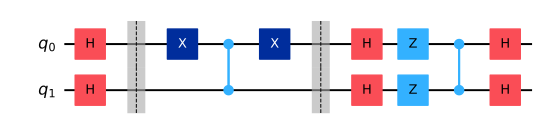

In [20]:
n = 2;

qc = QuantumCircuit(n)

# first we initialize in a uniform superposition
for iq in range(n):
    qc.h(iq)
    
qc.barrier()

# oracle
qc.x(0)
qc.cz(0,1)
qc.x(0)

qc.barrier()

# reflection
for iq in range(n):
    qc.h(iq)
    qc.z(iq)
    
qc.cz(0,1)

#final H
for iq in range(n):
    qc.h(iq)
    
qc.draw('mpl')

{'10': 1}


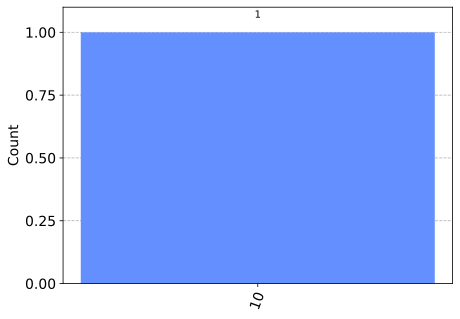

In [21]:
qc.measure_all()

backend = QasmSimulator()
counts = backend.run(qc,shots = 1).result().get_counts()
print(counts)
plot_histogram(counts)

## 2. Example with 3 qubits

#### We seek two states, $|101\rangle$ and $|110\rangle$. Implemented as in Nat. Commun. 8, 1918 (2017)

In [22]:
# phase oracle to mark states 101 and 110
def phase_oracle(circ):
    circ.cz(0,2)
    circ.cz(1,2)

In [23]:
circ = QuantumCircuit(3)

circ.cz(0,2)
circ.cz(1,2)

backend = UnitarySimulator()
U = backend.run(circ).result().get_unitary()

print(np.real(U))

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [-0. -0. -0. -0. -0. -1. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -1. -0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


In [24]:
# define reflection operation (aka diffuser)
def diffuser(circ):
    qubit = circ.qubits
    n_q = len(qubit)
    
    for k in range(n_q):
        circ.h(k)
        circ.x(k)
        
    # controlled-C operations
    circ.h(2)
    circ.ccx(0,1,2)
    circ.h(2)
    
    for k in range(n_q):
        circ.x(k)
        circ.h(k)

In [25]:
circ = QuantumCircuit(3)

diffuser(circ)

backend = UnitarySimulator()
U = backend.run(circ).result().get_unitary()

print(np.real(U))

[[ 0.75 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25 -0.25 -0.25 -0.25 -0.25]
 [-0.25 -0.25 -0.25  0.75 -0.25 -0.25 -0.25 -0.25]
 [-0.25 -0.25 -0.25 -0.25  0.75 -0.25 -0.25 -0.25]
 [-0.25 -0.25 -0.25 -0.25 -0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.75]]


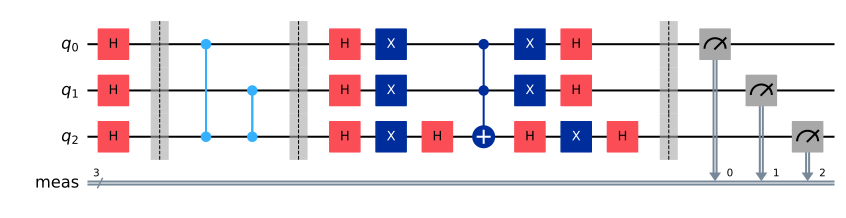

In [26]:
# main
n = 3

Grover3 = QuantumCircuit(n)

for k in range(n):
    Grover3.h(k)
    
Grover3.barrier()

phase_oracle(Grover3)

Grover3.barrier()

diffuser(Grover3)

Grover3.measure_all()

Grover3.draw('mpl')

{'110': 5049, '101': 4951}


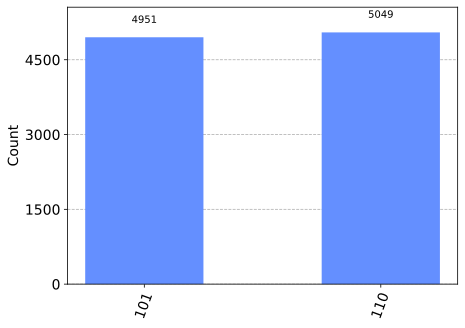

In [27]:
# run on simulator
backend = QasmSimulator()
counts = backend.run(Grover3,shots = 10000).result().get_counts()
print(counts)
plot_histogram(counts)

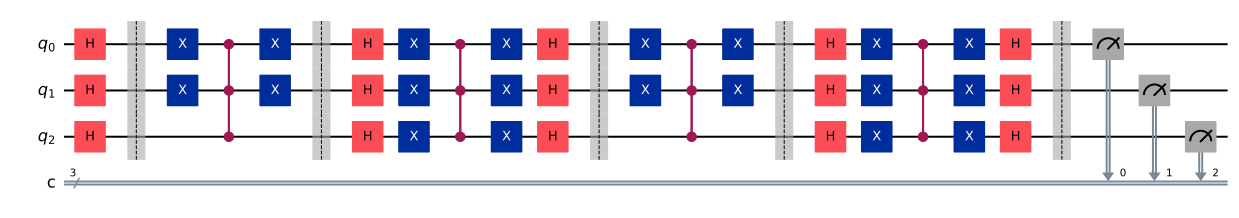

In [48]:
qc = QuantumCircuit(3,3);

#qc.x(2)

qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()

n_chiamate = 2;

for k in range(n_chiamate):
    qc.x(0)
    qc.x(1)
    qc.ccz(0,1,2)
    qc.x(0)
    qc.x(1)

    qc.barrier()
    
    qc.h(0)
    qc.h(1)
    qc.h(2)
    
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.ccz(0,1,2)
    qc.x(0)
    qc.x(1)
    qc.x(2)
    
    qc.h(0)
    qc.h(1)
    qc.h(2)

    qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.draw('mpl')

{'010': 11, '100': 940, '110': 9, '001': 8, '000': 12, '111': 7, '011': 4, '101': 9}


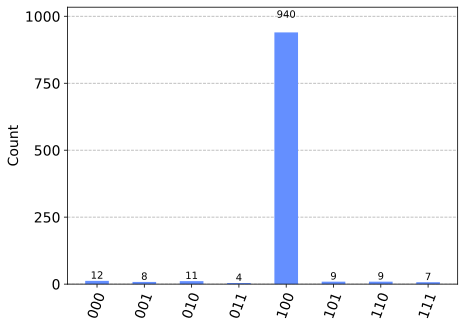

In [49]:
# run on simulator
backend = QasmSimulator()
counts = backend.run(qc,shots = 1000).result().get_counts()
print(counts)
plot_histogram(counts)

In [53]:
# run on hardware
service = QiskitRuntimeService(channel='ibm_quantum',token='a67cbd727256bbab2306b1857d9a0fcbc82dc599a32a20157a0be3e76894a4a8860a4c69252121fbb7f03d9caca6f126661885cddbc21c0bc39a5eb3cf62220d')
service.backends()

[<IBMBackend('ibm_oslo')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [54]:
print('gates = ', qc.count_ops())
print('depth = ', qc.depth())

gates =  OrderedDict([('x', 20), ('h', 15), ('barrier', 5), ('ccz', 4), ('measure', 3)])
depth =  18


In [64]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

device = service.backend('ibm_brisbane')

#optimized_0 = transpile(qc, backend=device, seed_transpiler=11, optimization_level=0)
optimized = transpile(qc.decompose(), backend=device,  initial_layout=[1, 2, 3], optimization_level = 3)

print('gates = ', optimized.count_ops())
print('depth = ', optimized.depth())

optimized.draw('mpl')

gates =  OrderedDict([('rz', 176), ('sx', 125), ('ecr', 47), ('x', 8), ('barrier', 5), ('measure', 3)])
depth =  231


In [ ]:
#backend = service.least_busy(simulator=False,operational=True)
backend = service.backend('ibm_brisbane')

job = backend.run(optimized,shots = 8192)

counts = job.result().get_counts()
display(plot_histogram(counts))